In [1]:
import nltk
import sklearn
import pandas as pd
import numpy as np
import re
import string
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
categories = fetch_20newsgroups().target_names

In [4]:
train= fetch_20newsgroups(subset="train" ,categories = categories) 

In [5]:
test= fetch_20newsgroups(subset="test" ,categories = categories) 

In [7]:
df = pd.DataFrame(train["data"], columns=["text"])
df["target"] = train["target"]
df.head()

,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [9]:
df_test = pd.DataFrame(test["data"], columns=["text"])
df_test["target"] = test["target"]
df_test.head()

,text,target
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19


In [10]:
stop = stopwords.words('english')

In [11]:
df["text"] = df["text"].str.lower()
df_test["text"] = df_test["text"].str.lower()

In [13]:
def rmv_emails_websites(string):
    """Function removes emails, websites and numbers"""
    new_str = re.sub(r"\S+@\S+", '', string)
    new_str = re.sub(r"\S+.co\S+", '', new_str)
    new_str = re.sub(r"\S+.ed\S+", '', new_str)
    new_str = re.sub(r"[0-9]+", '', new_str)
    return new_str

In [21]:
df['text'] = df['text'].apply(lambda x : rmv_emails_websites(x))
df_test['text'] = df_test['text'].apply(lambda x : rmv_emails_websites(x))

In [22]:
url = re.compile(r'https?://\S+|www\.\S+')
df['text'] = df['text'].apply(lambda x : url.sub(r'', x))
df_test["text"] = df_test["text"].apply(lambda x : url.sub(r'', x))

In [23]:
table = str.maketrans('', '', string.punctuation)
df['text'] = df['text'].apply(lambda x: x.translate(table))
df_test["text"] = df_test["text"].apply(lambda x: x.translate(table))

In [24]:
df.head()

,text,target
0,from wheres my thing\nsubject what car is thi...,7
1,from guy kuo\nsubject si clock poll final ca...,4
2,from thomas e willis\nsubject pb questions\no...,4
3,from joe green\nsubject re weitek p \norganiz...,1
4,from jonathan mcdowell\nsubject re shuttle la...,14


In [25]:
df_test.head()

,text,target
0,from neil b gandler\nsubject need info on bo...,7
1,from rick miller \nsubject xface\norganization...,5
2,from mathew \nsubject re strong weak atheism\...,0
3,from dave bakken\nsubject re saudi debut of ...,17
4,from jon livesey\nsubject re after years can...,19


In [26]:
df["text"] = df["text"].apply(lambda line: line[5:])
df_test["text"] = df_test["text"].apply(lambda line: line[5:])

In [27]:
df["text"] = df["text"].apply(lambda line: line.replace("\n", " "))
df_test["text"] = df_test["text"].apply(lambda line: line.replace("\n", " "))

In [28]:
df["text"]

0         wheres my thing subject what car is this nntp...
1         guy kuo subject si clock poll  final call sum...
2         thomas e willis subject pb questions organiza...
3         joe green subject re weitek p  organization  ...
4         jonathan mcdowell subject re shuttle launch q...
                               ...                        
11309     jim zisfein  subject re migraines and scans d...
11310     subject screen death mac plus lines  organiza...
11311     will estes subject mounting  in vertical case...
11312      subject re sphere from  points organization ...
11313     kevin j gunning subject stolen cbrrr organiza...
Name: text, Length: 11314, dtype: object

In [29]:
df_test["text"]

0        neil b gandler subject need info on  bonnevil...
1       rick miller  subject xface organization just m...
2       mathew  subject re strong  weak atheism organi...
3        dave bakken subject re saudi  debut of human ...
4        jon livesey subject re after  years can we sa...
                              ...                        
7527     stupendous man subject re temperature of the ...
7528     jim smyton subject re monitors  should they b...
7529     subject re game length was re braves update o...
7530      subject intel chmos  design kit newssoftware...
7531     subject re homosexuality issues in christiani...
Name: text, Length: 7532, dtype: object

In [30]:
def text_process(text):
    """
    1. Remove stop words
    2. Return list of clean text words
    """
    return [word for word in text.split() if word.lower() not in stopwords.words('english')]

In [31]:
df["text"] = df["text"].apply(text_process)

In [32]:
df_test["text"] = df_test["text"].apply(text_process)

In [33]:
def list_to_string(text):
    line = ""
    for word in text:
        line += word + " "
    return line.strip()

In [34]:
df["text"] = df["text"].apply(list_to_string)

In [35]:
df_test["text"] = df_test["text"].apply(list_to_string)

In [36]:
df.head()

,text,target
0,wheres thing subject car nntppostinghost organ...,7
1,guy kuo subject si clock poll final call summa...,4
2,thomas e willis subject pb questions organizat...,4
3,joe green subject weitek p organization system...,1
4,jonathan mcdowell subject shuttle launch quest...,14


In [37]:
df_test.head()

,text,target
0,neil b gandler subject need info bonneville or...,7
1,rick miller subject xface organization lines d...,5
2,mathew subject strong weak atheism organizatio...,0
3,dave bakken subject saudi debut human rights g...,17
4,jon livesey subject years say christian morali...,19


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df["text"])

In [40]:
text_bow = bow_transformer.transform(df["text"])

In [30]:
print(text_bow.shape)

(11314, 116709)


In [31]:
text_bow.nnz

1279237

In [41]:
test_bow = bow_transformer.transform(df_test["text"])

In [33]:
print(test_bow.shape)

(7532, 116709)


In [34]:
test_bow.nnz

785399

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
tfidf_transformer = TfidfTransformer().fit(text_bow)

In [44]:
text_tfidf = tfidf_transformer.transform(text_bow)

In [45]:
test_tfidf = tfidf_transformer.transform(test_bow)

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
nb_model = MultinomialNB().fit(text_tfidf, df["target"])

In [69]:
all_pred_nb = nb_model.predict(test_tfidf)

In [49]:
from sklearn.neighbors import NearestCentroid

In [50]:
rocchio_model = NearestCentroid().fit(text_tfidf, df["target"])

In [51]:
all_pred_rc = rocchio_model.predict(test_tfidf)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn_model = KNeighborsClassifier().fit(text_tfidf, df["target"])

In [54]:
all_pred_knn = knn_model.predict(test_tfidf)

In [70]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [71]:
print("Precision score for Naive Bayse classifier")
precision_score(df_test["target"], all_pred_nb, average='macro')

Precision score for Naive Bayse classifier


0.8344076840023655

In [72]:
print("Recall score for Naive Bayse classifier")
recall_score(df_test["target"], all_pred_nb, average='macro')

Recall score for Naive Bayse classifier


0.7829845378330134

In [73]:
print("f1 score for Naive Bayse classifier")
f1_score(df_test["target"], all_pred_nb, average='macro')

f1 score for Naive Bayse classifier


0.7778189037762011

In [59]:
print("Precision score for Rocchio classifier")
precision_score(df_test["target"], all_pred_rc, average='macro')

Precision score for Rocchio classifier


0.7800058649580872

In [60]:
print("Recall score for Rocchioclassifier")
recall_score(df_test["target"], all_pred_rc, average='macro')

Recall score for Rocchioclassifier


0.7377806678863587

In [61]:
print("f1 score for Rocchio classifier")
f1_score(df_test["target"], all_pred_rc, average='macro')

f1 score for Rocchio classifier


0.7484119988136134

In [62]:
print("Precision score for KNN classifier")
precision_score(df_test["target"], all_pred_knn, average='macro')

Precision score for KNN classifier


0.7248771201384477

In [63]:
print("Recall score for Rocchioclassifier")
recall_score(df_test["target"], all_pred_knn, average='macro')

Recall score for Rocchioclassifier


0.7181217861345297

In [64]:
print("f1 score for KNN classifier")
f1_score(df_test["target"], all_pred_knn, average='macro')

f1 score for KNN classifier


0.7182835231263566

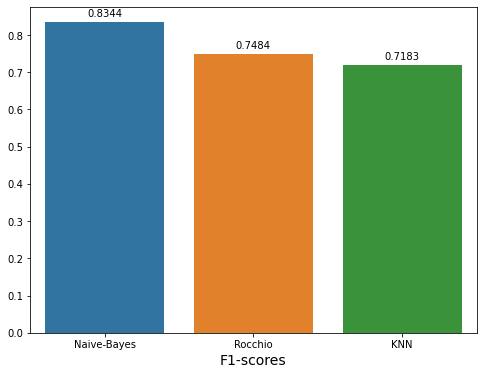

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

population=[0.844, 0.732, 0.788]
cv_metrics = pd.DataFrame({"Naive-Bayes": 0.8344076840023655,
                           "Rocchio": 0.7484119988136134,
                          "KNN": 0.7182835231263566
                          },
                         index=[0])
plt.figure(figsize=(8, 6))
splot=sns.barplot(data=cv_metrics)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("F1-scores", size=14);

